# 🤖 AI, MACHINE LEARNING & PYTHON 🤖

## Why does it all matter? 

AI is everywhere, particularly in healthcare.


![image](.//headline_1.png)

![image](.//headline_2.png)

AI is going to become more and more prominent within the NHS.

![image](.//headline_3.png)

Also, AI is just really interesting! (And sometimes a bit scary!) It's here to stay, so understanding it is going to be an incredibly useful skill.
Here are a final selection of headlines to show just how **versatile**, **interesting**, and **important** AI is becoming.

![image](.//headline_4.png)

![image](.//headline_5.png)

## What is todays plan? 

##### **Can we create a model that can predict if an individual has breast cancer?**

![image](.//headline_6.png)

### Before we get into coding - let us quickly give some definitions. 

#### AI vs Machine Learning

- AI is a general term used to describe computers completing task that we would consider clever or intelligent. 

- Machine Learning is a particular application of AI, it is the idea that with data, computers can learn for themselves and make predictions. 



## Python Recap

We are going to give a quick recap of python functions to help with our understanding later. 

In [2]:
# This is a very simple function that works out percentages.
# You pass it in two numbers, called parameters.
# These represent the numerator and denominator of a fraction.
# Some simple maths is done, and the fraction is returned.  

def calculate_percentage(numerator, denominator):
    fraction = numerator / denominator
    return fraction * 100

# When you run this code snippet nothing will happen,
# you need to call the function for it to return you something.

In [ ]:
# Call the function here:

calculate_percentage( """your_values_here""" )

## Machine Learning time!

To create our machine learning model, a lot of the code we are about to use uses functions. We get these functions from libraries which we can import.

In [3]:
# This first function is used to load a pre-existing breast cancer dataset
from sklearn.datasets import load_breast_cancer

# Pandas is a library containing lots of functions used to modify and navigate dataframes.
import pandas as pd

# Plotly is a library which helps us generate plots.
import plotly.express as px

In [4]:
# We are about to use the load_breast_cancer function from sklearn 
# This line calls the function to return:

#breast_cancer_inputs  
# - This is the raw data containing information about different breast cancer screenings

#breast_cancer_outputs 
# - This contains the classification of whether each screening is identified as being breast cancer

breast_cancer_inputs, breast_cancer_outputs = load_breast_cancer(return_X_y=True, as_frame=True) 

In [5]:
# What does the data look like?
display(breast_cancer_inputs)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


Let's be honest, this data is really confusing and we cannot really tell anything from it!

We can create a plotting function to help us spot some trends. 

In [25]:
def produce_scatter_plot(input_dataframe: pd.DataFrame,
                         output_series: pd.Series,
                         columns:list):
    """Produces a 2D or 3D scatter plot based on columns from dataframe.

    Args:
        input_dataframe (pd.DataFrame): The dataframe containing breast cancer information
        output_series (pd.Series): The dataframe containing diagnosis information
        columns (list): The columns to plot.
    """
    
    # Generate a series of strings to use as a colour key
    colours = pd.Series("True" if  value else False for value in output_series)
    
    #Check the length of the columns.
    # If length is 3, make a 3D plot.
    # If length is 2, make a 2D plot.
    if len(columns) == 3:
        fig = px.scatter_3d(input_dataframe, x=columns[0], y=columns[1], z=columns[2], color=colours, symbol =colours, labels={"color": "Diagnosis", "Symbol": "Diagnosis"})
    elif len(columns) == 2:
        fig = px.scatter(input_dataframe, x=columns[0], y=columns[1], color=colours, symbol =colours, labels={"color": "Diagnosis", "Symbol": "Diagnosis"})
    elif len(columns) != (2 or 3):
        print("Please only use 2 or 3 columns")
        return None

    # Update the graphics
    fig.update_traces(marker=dict(size = 4 if len(columns) == 3 else 10,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
    
                  selector=dict(mode='markers'))
    
    fig.show()
    return None

# TASK

This plotting function can be called by passing into it breast_cancer_inputs, breast_cancer_outputs, and an array of column names.

Try using the column names to generate some 2D and 3D plots, see if you see any trends. 

In [26]:
# Remind ourselves of the column names
print(breast_cancer_inputs.columns)

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')


In [27]:
produce_scatter_plot(breast_cancer_inputs,
                     breast_cancer_outputs,
                     [])

Please only use 2 or 3 columns


In [28]:
produce_scatter_plot(breast_cancer_inputs,
                     breast_cancer_outputs,
                     [])

Please only use 2 or 3 columns


There are 30 different columns within this dataset, meaning there are 439 different pairs you could plot in a 2D graph. Spotting patterns, or more importantly the most important patterns, is an incredibly complex task. 

Further to this, imagine having a 30 dimensional scatter plot to try and spot patterns. For us, it is impossible! But for a machine, this is something it can do easily. 

#### Can we use this data in a machine learning model? Yes!

In [10]:
from sklearn.model_selection import train_test_split

# When creating a machine learning model, it is important to have some training data and some testing data.

# Training data - this is data that is used to train the model.
# Testing data - this is data used to test the model.

# The following function splits our data randomly to test and training data.
breast_cancer_inputs_training, breast_cancer_inputs_testing, breast_cancer_outputs_training, breast_cancer_outputs_testing = train_test_split(breast_cancer_inputs, breast_cancer_outputs, train_size=0.8)

# train_size represents the proportion of data that should be used for training
# - we have gone for 80%

#### There are multiple types of machine learning algorithms: 

**Classification algorithms** are machine learning techniques used to predict categorical labels or classes based on input data.

**Regression algorithms** are machine learning techniques used to predict continuous numerical values based on input data.

**Clustering algorithms** are machine learning techniques used to group similar data points together based on their inherent similarities, without any predefined labels.

#### Can you tell which type of algorithm we want to use?

In [11]:
from sklearn.ensemble import RandomForestClassifier

# This is one example of a classification model, called a random forest classifier.
# Others are available, which you can look up if you would like to. 

classification_model = RandomForestClassifier()

Once we have a model, our next step is to train it.

sklearn has an incredibly useful function - `fit` 

The fit method trains the algorithm on the data.

How it does this depends on the model.




In [12]:
classification_model.fit(breast_cancer_inputs_training,breast_cancer_outputs_training)

RandomForestClassifier()

Next, we can use `predict`. This uses the pre-trained model to predict the results of our test set. It really is that simple!

In [13]:
predictions = classification_model.predict(breast_cancer_inputs_testing)

What do the predictions actually look like? 

In [14]:
print(predictions)

[1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 0
 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 0 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 0 1 0
 1 0 1 1 1 1 0 0 1 0 1 0 1 1 1 1 1 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 1 1 1 1 0
 0 0 0]


Let's do some analysis to see how good our predictions are! 

In [15]:
# matplotlib is another plotting library similar to plotly.

import matplotlib.pyplot as plt

def plot_predictions(predictions, actual):
    """Creates a pie chart

    Args:
        predictions (Series): Predicted values by the model
        actual (Series): Actual values
    """

    correct_predictions = 0
    incorrect_predictions = 0

    for prediction, value in zip(predictions, actual):
        if prediction == value:
            correct_predictions += 1
        else:
            incorrect_predictions += 1

    total_predictions = len(predictions)

    # Remember our function we made earlier!
    correct_percentage = round( calculate_percentage(correct_predictions,total_predictions) ,1)
    incorrect_percentage = round( calculate_percentage(incorrect_predictions,total_predictions), 1)

    # Plot the chart
    plt.pie([correct_predictions,incorrect_predictions],
            labels=[f"Correct Predictions\n{correct_percentage}",f"Incorrect Predictions\n{incorrect_percentage}%"])
             
    # Add a title
    plt.title("Percentage of Correct and Incorrect Predictions")
    
    return None
    

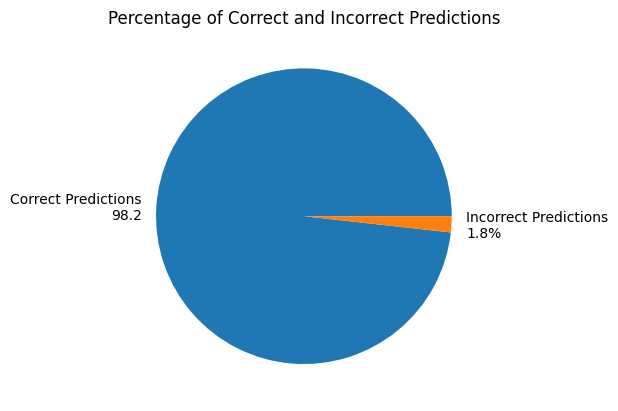

In [16]:
plot_predictions(predictions, breast_cancer_outputs_testing)

There are other ways to analyse our results. For example using a confusion matrix. 

In [17]:
from sklearn import metrics

def generate_confusion_matrix(predicted, actual):
    """Creates a confusion matrix chart

    Args:
        predictions (Series): Predicted values by the model
        actual (Series): Actual values
    """
    confusion_matrix = metrics.confusion_matrix(actual, predicted)

    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

    cm_display.plot()

    plt.title("Confusion Matrix")

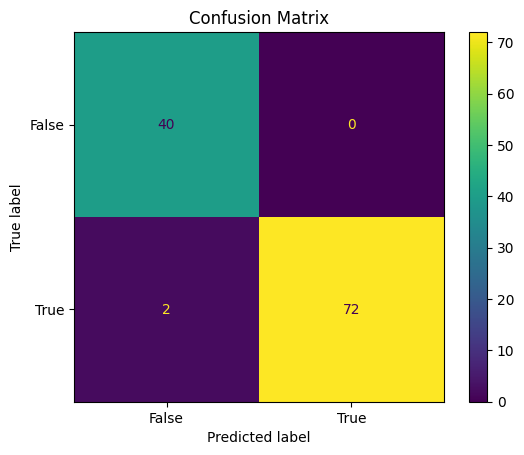

In [18]:
generate_confusion_matrix(predictions, breast_cancer_outputs_testing)

### What does this actually show? 

The matrix has four squares, each representing a different combination of actual and predicted classifications. The squares are:

- True Positive (TP): The model correctly predicted the positive diagnosis.
- False Positive (FP): The model incorrectly predicted the positive diagnosis.
- True Negative (TN): The model correctly predicted the negative diagnosis.
- False Negative (FN): The model incorrectly predicted the negative diagnosis.

Can you tell which square is which in the above matrix?

Another method of analysis is an **F1 Score**

This is given as:

**F1 = 2 * (precision * recall) / (precision + recall)**

Where:
- Precision is a measure of how many predicted positive diagnosis' are actually positive. This is found by taking the number of true positives and dividing by the number of true and false positives.
- Recall is the percentage of positive cases that are correctly predicted by the model.

A perfect prediction would give an F1 score of 1, with the worst possible score being 0. 


In [23]:
f1_score = metrics.f1_score(breast_cancer_outputs_testing, predictions)

print(f1_score)

0.9863013698630138


# TASK

So you have made predictions using the random forest algorithm, but could you use something else instead?

Head to https://scikit-learn.org/stable/supervised_learning.html and see what other models are available.

Can you find any better classification models for our dataset?

In [ ]:
## Your code here!

classification_model = 
